In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [3]:
train_path = 'D:/thesis_work/fruits/Fruits Classification/train'
test_path = 'D:/thesis_work/fruits/Fruits Classification/test'
val_path = 'D:/thesis_work/fruits/Fruits Classification/valid'

In [9]:
img_width, img_height = 200, 200
batch_size = 32
epochs = 100

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 9700 images belonging to 5 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(directory=test_path,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 100 images belonging to 5 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

Epoch 1/100
303/303 [==============================] - 44s 143ms/step - loss: 1.2843 - accuracy: 0.4308 - val_loss: 0.9666 - val_accuracy: 0.6042
Epoch 2/100
303/303 [==============================] - 43s 141ms/step - loss: 1.0753 - accuracy: 0.5462 - val_loss: 0.9141 - val_accuracy: 0.6562
Epoch 3/100
303/303 [==============================] - 43s 141ms/step - loss: 1.0166 - accuracy: 0.5837 - val_loss: 0.9032 - val_accuracy: 0.6771
Epoch 4/100
303/303 [==============================] - 43s 142ms/step - loss: 0.9634 - accuracy: 0.6135 - val_loss: 0.9255 - val_accuracy: 0.6354
Epoch 5/100
303/303 [==============================] - 43s 143ms/step - loss: 0.9272 - accuracy: 0.6333 - val_loss: 0.7552 - val_accuracy: 0.6771
Epoch 6/100
303/303 [==============================] - 43s 142ms/step - loss: 0.8827 - accuracy: 0.6512 - val_loss: 1.0092 - val_accuracy: 0.6250
Epoch 7/100
303/303 [==============================] - 43s 142ms/step - loss: 0.8481 - accuracy: 0.6656 - val_loss: 0.7128 -

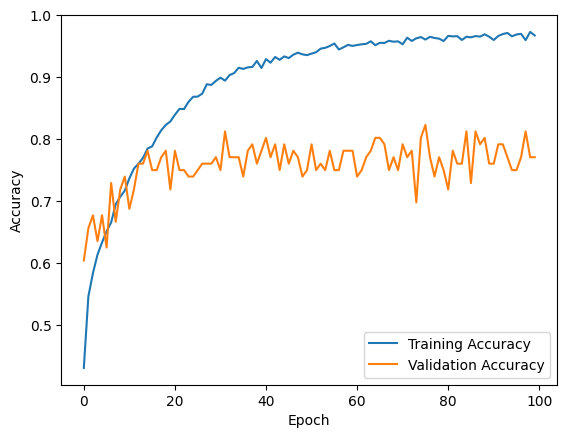

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

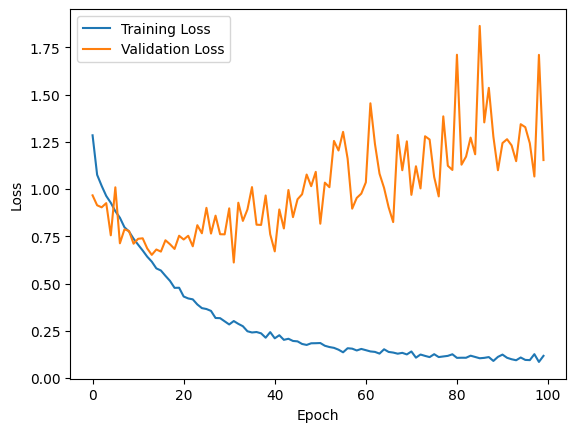

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Class of Fruits:
# 0 -- Apple
# 1 -- Banana
# 2 -- Grape
# 3 -- Mango
# 4 -- Strawberry

In [ ]:
# Predict Mango
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/test/Mango/Mango (1477).jpeg')

In [ ]:
# Predict Banana
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/test/Banana/Banana (2044).jpeg')

In [ ]:
# Predict Apple
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/train/Apple/Apple (1).jpeg')

In [ ]:
# Predict Grape
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/train/Grape/Grape (1007).jpeg')

In [ ]:
# Predict Stawberry
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/test/Strawberry/Strawberry (1423).jpeg')

In [17]:
model.save('Fruits_model/fruits_cnn3_model.h5')